# The Need For Balanced Global Freshwater Usage 

Fei Wang

12/10/2017

## Introduction

This study is my final project for the DATA 512 class of Human Centered Data Science in the Fall 2017 quarter. The sustainability of global freshwater consumption is a topic with huge implications on humanity that affects everyone’s life, whereas there a lack of understanding of the modern framework of study on this subject – Global Water Footprint. The goal of this study is to raise the awareness of this issue, promote the idea of Global Water Footprint study proposed by prof. Arjen Hoekstra, and provide example research questions and tools for those who are interested to easily access, replicate and extend the studies by prof. Arjen Hoesktra and his team. The ultimate solution to the water usage problem lies in the hands of each individual and I hope this study can be helpful for in tackling this complicated issue.

## Background

The issue of the world's fresh-water consumption has been traditionally studied only at a national level based on a basic principle of national demand is less than or equal to the national supply. But recent studies by Prof. Arjen Hoekstra et al. showed that through international trade of products, countries have transferred vast amount of freshwater consumption responsibility to other countries which might be less water resource abundant or with less efficient water usage technology. So, the amount of freshwater usage a country should be accountable for is the water usage due to the production of the products that a country’s inhabitants consumed, instead of the water usage during a country’s production process. 

To reduce the global freshwater consumption in aggregate, not only do water policy decision makers need to put their water consumption within a global context, also they need to adopt a more holistic view by considering of the interaction between one country's water policy and policies in related sectors like energy, trade, technology, agriculture and so on. At the individual level, the public should be more informed with the diversity of water intensity among all the products they consume every day. To study the issue of freshwater consumption within a global context, Prof. Arjen Hoekstra coined the term "Water Footprint" (WF), which extended the traditional definition of water usage by incorporating new dimensions like time, location, water type etc. Furthermore, the WF framework also separate water usage in different sectors (crop, animal, industrial, direct consumption) and types of freshwater consumed:

    1) Green – rainfall water consumed
	2) Blue – Surface and ground water consumed
	3) Grey – The water polluted to assimilate the pollutants generated during the production process
With the establishment of the Water Footprint Network, public can get access to numerous studies [1-3], on global water consumption over the last decade and see the vast imbalance of water usage among the world. But the study results are mostly presented via a form of exploratory analyses, indicating key areas of extreme water footprint imbalance or the water resource scarcity. More hidden patterns of global water footprint would be discovered by applying more data science oriented approaches (regression analysis, anomaly detection for example). 


To extend the studies of Prof. Arjen Hoekstra et al., I analyzed the data of global virtual water flow and the WF-Per-Capita by country to answer the following research questions:

    1)	Are the global flow of virtual water and WF-Per-Capita distributed evenly? If there are outliers, why?
    2)	How much variance of the Water Footprint per-capita can be explained by the difference in standard of living of different countries?
    3)	Are the developed countries transferring water pollution to the developing world? 

The first research question is my effort to try to operationalize the process of identifying countries with freshwater usage that is disproportional to the size of its economy.

The second research question is to test the hypothesis that “people in rich countries generally consume more and thus they consume more freshwater.” As Prof. Arjen Hoekstra and his colleagues have pointed out, there are more factors to consider besides people’s capability to consume, including the water-intensity of the consumption pattern of a country’s inhabitants, the water usage efficiency and water resource abundancy of where the products were produced and so on. But how much weight do those factors carry? I decided to run a linear regression between the WF-per-capita and GDP-per-capita of 175 countries and check the degree of correlation. GDP-per-capita is a proxy of the standard of living of a country’s inhabitants. 

The third research question originated from a key principle in human-centered data science - fairness, measuring whether the virtual water flow due to trade causing imbalanced distribution of polluted water among the world. In other words, are the developed countries exploiting water resources in the developing world.

Based on the principle of replicability in open research, I built an interactive visualization dashboard using the R Shiny app. This dashboard provides users a more flexible way to discover global water footprint patterns. Most of the analyses above are conducted with assistance of this dashboard.

## Methods and Findings

For the first question, it's exploratory analysis nature. I used the R Shiny dashboard to dynamically check the "fun facts" of global virtual water flow and WF-Per-Capita. 

Imbalanced, fun facts like Italy, Pakistan, with images


In [204]:
setwd('C:/Users/v-wafe/working/data-512-final-project/Data')

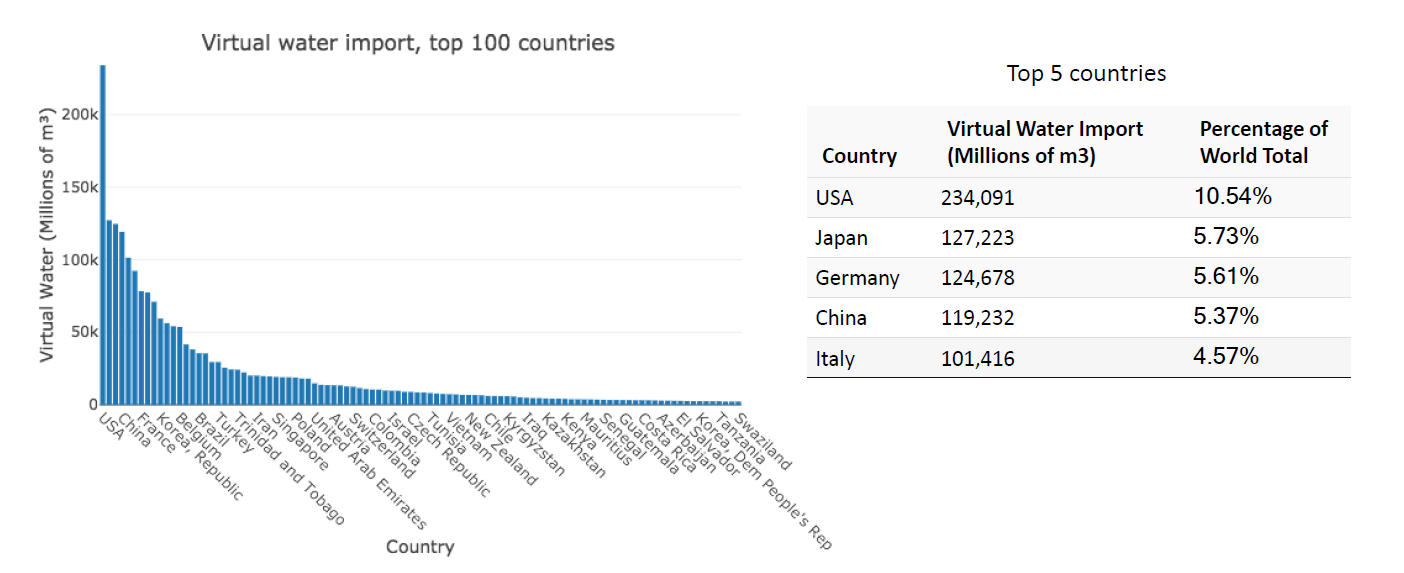

In [206]:
library("IRdisplay")
display_png(file="../Images/EDA_1_Top5Countries_VW_Import.png")  

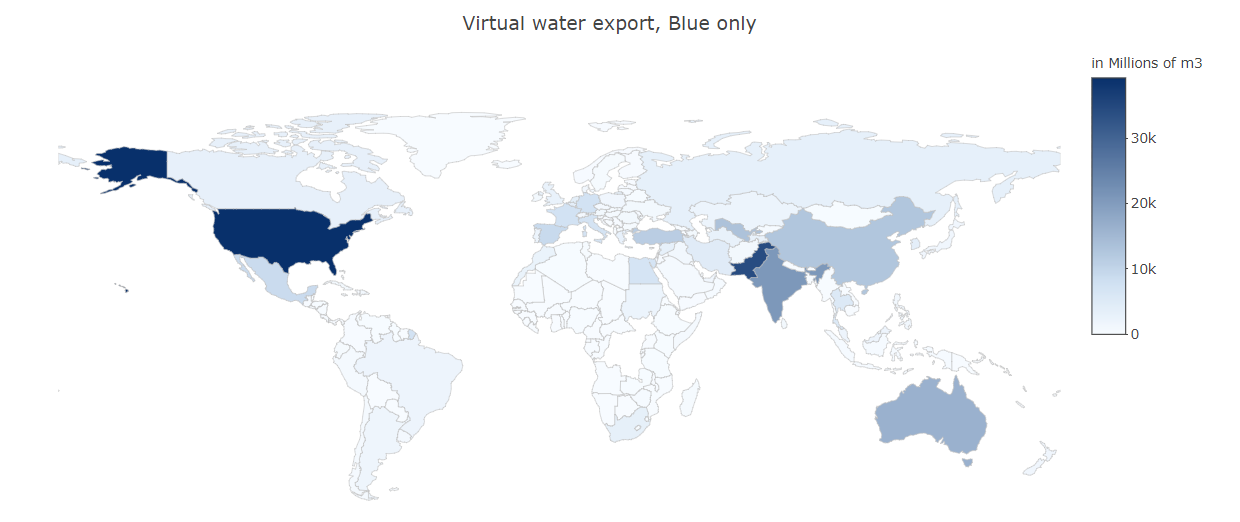

In [207]:
display_png(file="../Images/EDA_2_Distribution_Blue_VW_Export.png")  

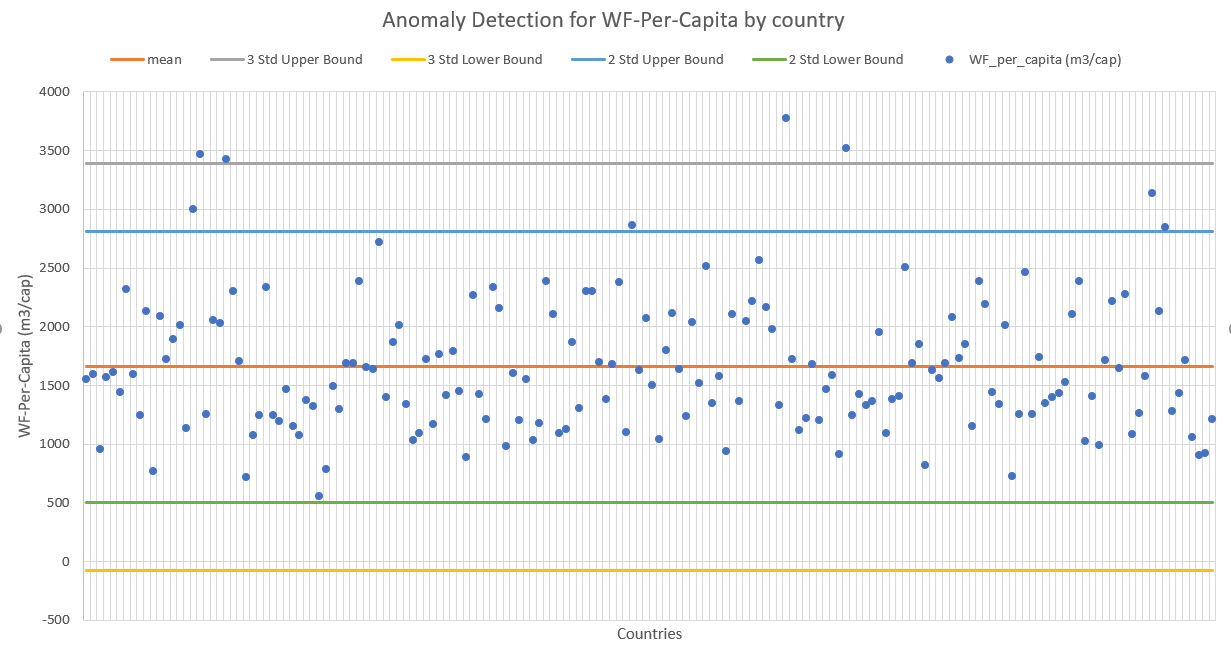

In [208]:
display_png(file="../Images/EDA_3_Anomaly_Detection_WF_Per_Capita.png")  

In [ ]:
2)	Little correlation between WF-PC and GDP-PC
3)	Significant difference of “polluted water export” between developed and developing countries 

## Discussion

    1) The data on global WF by country is annual average amounts of years 1996 – 2005, hence I was not able to present the trend of WF changes. 

    2) No water scarcity data, they are based on river basins, not by country; need granular data on WF at region level, not just country level; 

## Conclusion

## References

1) Mekonnen, M.M. and Hoekstra, A.Y. (2011) National water footprint accounts: [The green, blue and grey water footprint of production and consumption](http://www.waterfootprint.org/Reports/Report50-NationalWaterFootprints-Vol1.pdf), Value of Water Research Report Series No. 50, UNESCO-IHE, Delft, the Netherlands

2) Hoekstra, A.Y. and Mekonnen, M.M. (2012) [The water footprint of humanity](http://waterfootprint.org/media/downloads/Hoekstra-Mekonnen-2012-WaterFootprint-of-Humanity.pdf), Proceedings of the National Academy of Sciences, 109(9): 3232–3237.

3) Mekonnen, M.M. and Hoekstra, A.Y. (2011) [The green, blue and grey water footprint of crops and derived crop products](http://waterfootprint.org/media/downloads/Mekonnen-Hoekstra-2011-WaterFootprintCrops.pdf), Hydrology and Earth System Sciences, 15(5): 1577-1600.

4) UN report, [Country Classification of 2014](http://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf)

5) World Bank national accounts data, [GDP per capita, 1996 - 2016](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?end=2016&start=1996)


## Code

In [201]:
library(reshape2)
library(dplyr)
library(plotly)
library(stringr)
options(scipen=999)

### Load Data on global virtual water flow

"Report50-Appendix-II&III.xls" downloaded at http://waterfootprint.org/media/downloads/Report50-Appendix-II&III.xls

save its second tab as GlobalVirtualWaterFlow.csv
remove the first 5 rows of header, remove rows where country value == "Others" or "Total", remove the last 9 columns 
Reference paper "Hoekstra, A.Y. and Mekonnen, M.M. (2012) 'The water footprint of humanity’, Proceedings of the National Academy of Sciences, 109(9): 3232–3237." http://waterfootprint.org/media/downloads/Hoekstra-Mekonnen-2012-WaterFootprint-of-Humanity.pdf

In [109]:
dfWaterFlow = read.csv('GlobalVirtualWaterFlow.csv', header = TRUE)

names(dfWaterFlow) = c('country'
                      , 'import_crop_green', 'import_crop_blue', 'import_crop_grey'
                      , 'import_animal_green', 'import_animal_blue', 'import_animal_grey'
                      , 'import_industrial_blue', 'import_industrial_grey'
                      , 'export_crop_green', 'export_crop_blue', 'export_crop_grey'
                      , 'export_animal_green', 'export_animal_blue', 'export_animal_grey'
                      , 'export_industrial_blue', 'export_industrial_grey'
                    )

In [113]:
a = melt(dfWaterFlow, id.vars = c("country"))
a[, c('action', 'product_type', 'water_type')] = str_split_fixed(a$variable, "_", 3)
dfWaterFlow = a[,c('country', 'action', 'product_type', 'water_type', 'value')]
names(dfWaterFlow)[5] <- 'amount'

dfWaterFlow%>% mutate_if(is.factor, as.character) -> dfWaterFlow

In [118]:
dfWaterFlow[dfWaterFlow$country == 'CÃ´te d\'Ivoire', ]$country <- 'Cote d\'Ivoire'
dfWaterFlow[dfWaterFlow$country == 'Congo, Dem Republic', ]$country <- 'Congo, Democratic Republic'
dfWaterFlow[dfWaterFlow$country == 'East Timor   ', ]$country <- 'East Timor'
dfWaterFlow[dfWaterFlow$country == 'Korea, Dem People\'s Rep', ]$country <- 'Korea, Democratic People\'s Rep'

#### add the net virtual water flow amount per country, product type and water type

In [120]:
a = aggregate(amount ~ country+product_type+water_type, dfWaterFlow[dfWaterFlow$action == 'import', ], function(x) sum(x))
b = aggregate(amount ~ country+product_type+water_type, dfWaterFlow[dfWaterFlow$action == 'export', ], function(x) sum(x))
names(a) <- c('country', 'product_type', 'water_type', 'import')
names(b) <- c('country', 'product_type', 'water_type', 'export')
c = merge(a, b, on = c('country', 'product_type', 'water_type'), all = TRUE)
c$amount = c$import - c$export
c = c[, c('country', 'product_type', 'water_type', 'amount')]
c$action = 'net'
c = c[, c('country', 'action', 'product_type', 'water_type', 'amount')]
dfWaterFlow = rbind(dfWaterFlow, c)

In [123]:
save(dfWaterFlow, file = 'dfWaterFlow.RData')

The datasets are pretty small so I do not include any sample data here

### Load Data on global virtual water flow

"Report50-Appendix-VIII&IX.xls" downloaded at http://waterfootprint.org/media/downloads/Report50-Appendix-VIII&IX.xls

save its second tab as WFPerCapita.csv
remove the first 5 rows of header, remove rows where country value == "World", remove the last 10 columns (which are under the title "Total water footprint of national consumption")

Reference paper "Hoekstra, A.Y. and Mekonnen, M.M. (2012) 'The water footprint of humanity’, Proceedings of the National Academy of Sciences, 109(9): 3232–3237." http://waterfootprint.org/media/downloads/Hoekstra-Mekonnen-2012-WaterFootprint-of-Humanity.pdf

In [129]:
dfWFPC = read.csv('WFPerCapita.csv', header = TRUE)

names(dfWFPC) = c('country', 'population'
                      , 'agricultral_internal_green', 'agricultral_internal_blue', 'agricultral_internal_grey'
                      , 'agricultral_external_green', 'agricultral_external_blue', 'agricultral_external_grey'
                      , 'industrial_internal_blue', 'industrial_internal_grey'
                      , 'industrial_external_blue', 'industrial_external_grey'
                      , 'domestic_internal_blue', 'domestic_internal_grey'
                    )

In [135]:
a = melt(dfWFPC, id.vars = c("country", "population"))
a[, c('product_type', 'water_source', 'water_type')] = str_split_fixed(a$variable, "_", 3)
dfWFPC = a[,c('country', 'population', 'product_type', 'water_source', 'water_type', 'value')]
names(dfWFPC)[6] <- 'amount'

dfWFPC%>% mutate_if(is.factor, as.character) -> dfWFPC

In [141]:
dfWFPC[dfWFPC$country == 'CÃ´te d\'Ivoire', ]$country <- 'Cote d\'Ivoire'
dfWFPC[dfWFPC$country == 'Congo, Dem Republic', ]$country <- 'Congo, Democratic Republic'
dfWFPC[dfWFPC$country == 'East Timor   ', ]$country <- 'East Timor'
dfWFPC[dfWFPC$country == 'Korea, Dem People\'s Rep', ]$country <- 'Korea, Democratic People\'s Rep'

In [183]:
save(dfWFPC, file = 'dfWFPC.RData')

### Load Data on Per-Capita GDP by country

"API_NY.GDP.PCAP.CD_DS2_en_csv_v2.zip" downloaded at https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?end=2016&start=1996

extract the zip file and modify the API_NY.GDP.PCAP.CD_DS2_en_csv_v2.csv file by removing its top 4 rows and saving it as "GDP_Per_Capita.csv"

In [159]:
dfGDPPC = read.csv('GDP_Per_Capita.csv', header = TRUE)

In [161]:
year_names = names(dfGDPPC)[5:length(names(dfGDPPC))]
names(dfGDPPC)[5:length(names(dfGDPPC))] = substring(year_names, 2)
names(dfGDPPC)[1:2] <- c('country', 'country_code')

In [165]:
dfGDPPC = dfGDPPC[, c('country', 'country_code', '2005')]

In [168]:
names(dfGDPPC)[3] <- 'GDP_PC_2005'

### Load Data on country classification

dataset created based on this UN report - Country Classification of 2014: http://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf

### Outliler Detection on WF-Per-Capita

In [187]:
dfWFPC_Total = aggregate(amount ~ country, dfWFPC, function(x) sum(x))

In [189]:
dfWFPC_Total$rank = seq.int(nrow(dfWFPC_Total))

In [192]:
names(dfWFPC_Total)

[1] "country" "amount"  "rank"

In [193]:
plot(dfWFPC_Total[, c('amount', 'rank')])

ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): unable to start png() device


plot without title

In [ ]:
outlierDetectionPlot 
 <- plot_ly(data = dfWFPC_Total, 
            x = 
            y = difference$amount , 
            type = "scatter", 
            mode = "markers", 
            color = ~type, 
            colors = colorSet
    ) %>%
    layout(xaxis = x
           , yaxis = y
     , title = "fdfd")